In [ ]:
#Author:cengizhunter
#year:2020
#landsat8 dataset from province Kocaeli/İzmit from Turkey

In [1]:
import os
import rasterio
from rasterio import plot
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
os.listdir('../bireyselrasterio/bands')

['2019_B4.tif', '2019_B5.tif', '2019_B6.tif', '2019_B7.tif']

In [3]:
band4 = rasterio.open('../bireyselrasterio/bands/2019_B4.tif') #RED
band5 = rasterio.open('../bireyselrasterio/bands/2019_B5.tif') #NIR
band6 = rasterio.open('../bireyselrasterio/bands/2019_B6.tif') #SWIR1
band7 = rasterio.open('../bireyselrasterio/bands/2019_B7.tif') #SWIR2

In [4]:
#Band 4 Height & Width
band4_height=band4.height
band4_width=band4.width
print("band4 height=",band4_height,"band4 width=",band4_width)

band4 height= 610 band4 width= 670


In [5]:
#Band 5 Height & Width
band5_height=band5.height
band5_width=band5.width
print("band5 height=",band5_height,"band5 width=",band5_width)

band5 height= 610 band5 width= 670


In [6]:
#Band 6 Height & Width
band6_height=band6.height
band6_width=band6.width
print("band6 height=",band6_height,"band6 width=",band6_width)


band6 height= 610 band6 width= 670


In [7]:
#Band 7 Height & Width
band7_height=band7.height
band7_width=band7.width
print("band7 height=",band7_height,"band7 width=",band7_width)

band7 height= 610 band7 width= 670


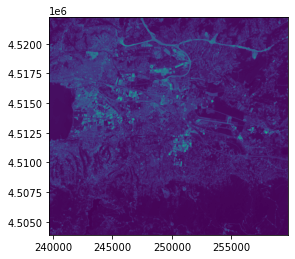

<AxesSubplot:>

In [8]:
plot.show(band4)

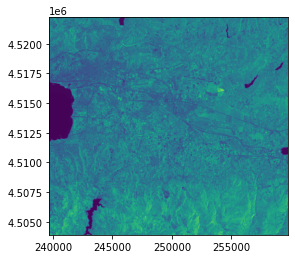

<AxesSubplot:>

In [9]:
plot.show(band5)

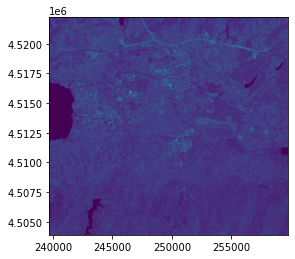

<AxesSubplot:>

In [10]:
plot.show(band6)

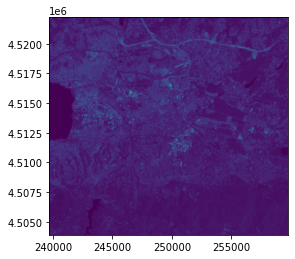

<AxesSubplot:>

In [11]:
plot.show(band7)

In [12]:
#type of raster byte
band4.dtypes[0],band5.dtypes[0],band6.dtypes[0],band7.dtypes[0]

('uint16', 'uint16', 'uint16', 'uint16')

In [13]:
#raster sytem of reference
crs=(band4.crs,band5.crs,band6.crs, band7.crs)
print(crs)
print("WGS 84 / UTM zone 36N - EPSG:32636")

(CRS.from_epsg(32636), CRS.from_epsg(32636), CRS.from_epsg(32636), CRS.from_epsg(32636))
WGS 84 / UTM zone 36N - EPSG:32636


In [14]:
band4.transform,band5.transform,band6.transform,band7.transform

(Affine(30.0, 0.0, 239685.0,
        0.0, -30.0, 4522215.0),
 Affine(30.0, 0.0, 239685.0,
        0.0, -30.0, 4522215.0),
 Affine(30.0, 0.0, 239685.0,
        0.0, -30.0, 4522215.0),
 Affine(30.0, 0.0, 239685.0,
        0.0, -30.0, 4522215.0))

In [15]:
band4.read(1)

array([[9217, 8986, 8610, ..., 7769, 7561, 7522],
       [9285, 8971, 8683, ..., 8231, 8050, 7902],
       [8781, 8757, 9115, ..., 8682, 8797, 8509],
       ...,
       [7552, 7627, 7117, ..., 6656, 6807, 6711],
       [8743, 8005, 7301, ..., 6654, 6691, 6684],
       [8856, 7255, 7247, ..., 6663, 6678, 6732]], dtype=uint16)

In [16]:
band5.read(1)

array([[20846, 22427, 21616, ..., 20967, 21428, 23301],
       [19336, 20172, 21546, ..., 19177, 21740, 23648],
       [19267, 19476, 21653, ..., 18013, 20348, 21609],
       ...,
       [29638, 29983, 30105, ..., 20584, 23766, 22803],
       [27892, 30000, 31930, ..., 21982, 21848, 22334],
       [26091, 30374, 31453, ..., 23180, 22573, 23492]], dtype=uint16)

In [17]:
band6.read(1)

array([[17520, 16887, 15510, ..., 14617, 14135, 14186],
       [17563, 16957, 15866, ..., 14948, 15390, 15503],
       [16014, 16394, 17447, ..., 15628, 16977, 17076],
       ...,
       [15268, 15241, 14478, ..., 12007, 12963, 13183],
       [16446, 15769, 15027, ..., 12122, 11953, 12533],
       [16438, 15038, 14771, ..., 12272, 12129, 13122]], dtype=uint16)

In [18]:
band7.read(1)

array([[11668, 11053, 10181, ...,  9395,  8946,  8780],
       [11762, 11180, 10414, ...,  9933,  9914,  9616],
       [10785, 10775, 11319, ..., 10622, 11350, 10919],
       ...,
       [ 9265,  9249,  8665, ...,  7874,  8344,  8391],
       [10382,  9568,  8903, ...,  7850,  7846,  8048],
       [10410,  8904,  8737, ...,  7834,  7800,  8285]], dtype=uint16)

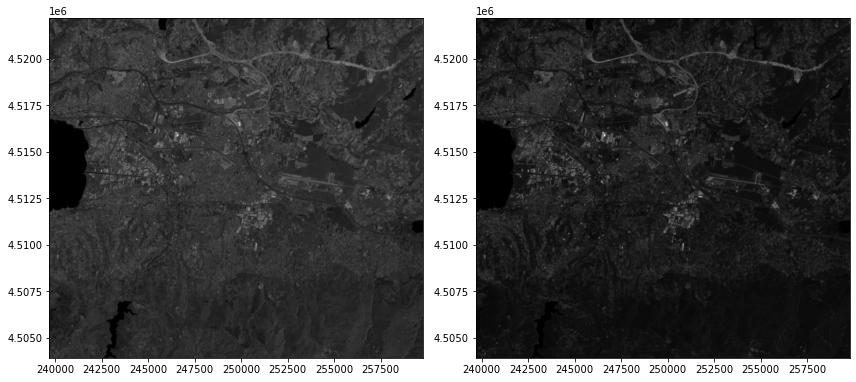

In [19]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

plot.show(band6, ax=ax1, cmap='Greys_r') #SWIR1
plot.show(band7, ax=ax2, cmap='Greys_r') #SWIR2
fig.tight_layout()

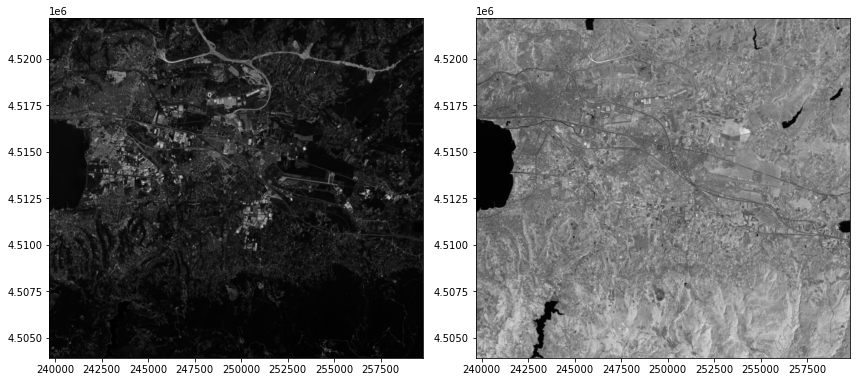

In [20]:
fig2, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

plot.show(band4, ax=ax1, cmap='Greys_r') #SWIR1
plot.show(band5, ax=ax2, cmap='Greys_r') #SWIR2
fig2.tight_layout()

In [21]:
#generate nir and red objects as arrays in float64 format
RED = band4.read(1).astype('float64')
NIR = band5.read(1).astype('float64')
SWIR1 = band6.read(1).astype('float64')
SWIR2 = band7.read(1).astype('float64')


In [22]:
#ndvi calculation, empty cells or nodata cells are reported as 0
NDVI=np.where(
    (NIR+RED)==0., 
    0, 
    (NIR-RED)/(NIR+RED))
NDVI[:5,:5]
#export ndvi image
NDVIImage = rasterio.open('../bireyselrasterio/Output/NDVI.tif','w',driver='Gtiff',
                          width=band4.width, 
                          height = band4.height, 
                          count=1, crs=band4.crs, 
                          transform=band4.transform, 
                          dtype='float64')
NDVIImage.write(NDVI,1)
NDVIImage.close()

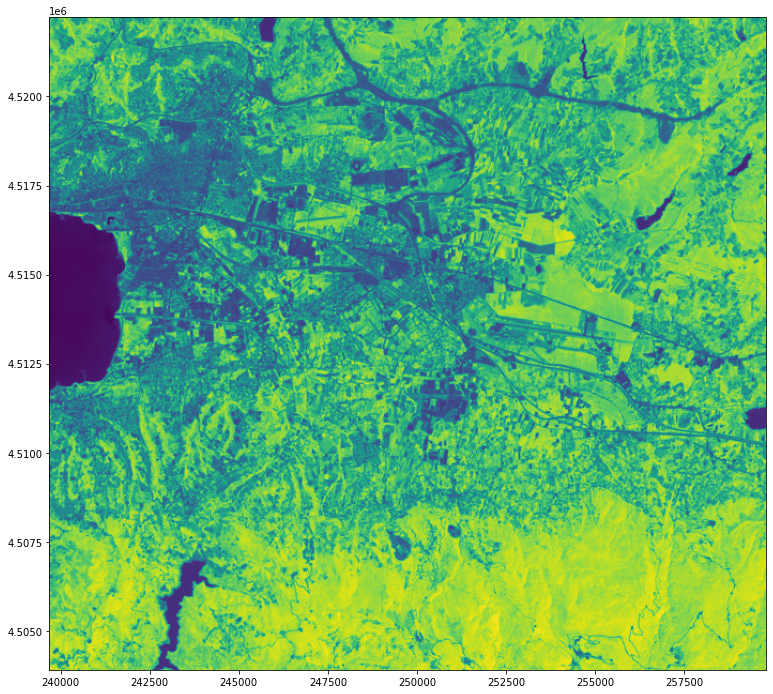

<AxesSubplot:>

In [23]:
#plot ndvi
NDVI = rasterio.open('../bireyselrasterio/Output/NDVI.tif')
fig = plt.figure(figsize=(18,12))
plot.show(NDVI)

In [24]:
#NDTI calculation, empty cells or nodata cells are reported as 0
NDTI=np.where(
    (SWIR1+SWIR2)==0., 
    0, 
    (SWIR1-SWIR2)/(SWIR1+SWIR2))
NDTI[:5,:5]
#export ndvi image
NDTIImage = rasterio.open('../bireyselrasterio/Output/NDTI.tif','w',driver='Gtiff',
                          width=band6.width, 
                          height = band6.height, 
                          count=1, crs=band6.crs, 
                          transform=band6.transform, 
                          dtype='float64')
NDTIImage.write(NDTI,1)
NDTIImage.close()

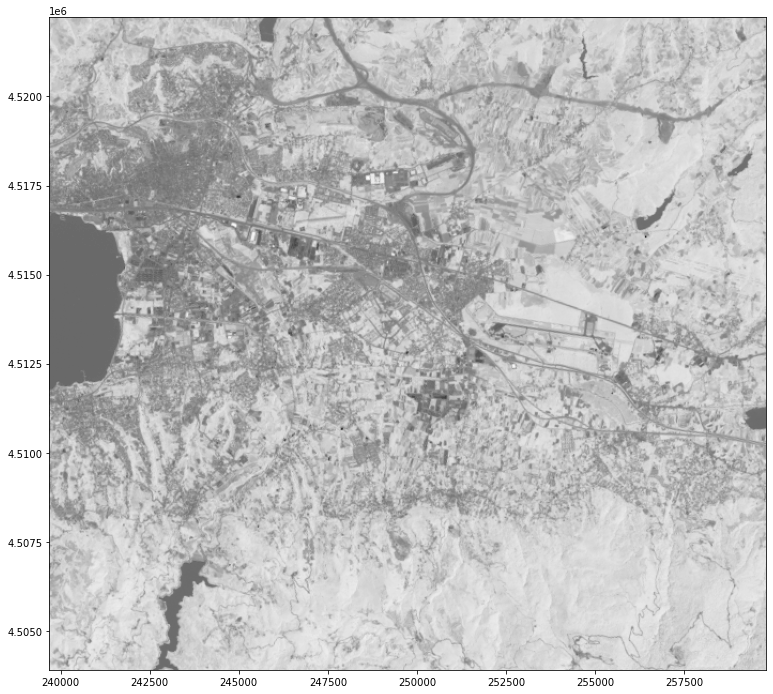

<AxesSubplot:>

In [25]:
#plot NDTI
NDTI = rasterio.open('../bireyselrasterio/Output/NDTI.tif')
fig = plt.figure(figsize=(18,12))
plot.show(NDTI, cmap='gray')

In [26]:
#NDBI calculation, empty cells or nodata cells are reported as 0
NDBI=np.where(
    (SWIR1+NIR)==0., 
    0, 
    (SWIR1-NIR)/(SWIR1+NIR))
NDBI[:5,:5]
#export ndvi image
NDBIImage = rasterio.open('../bireyselrasterio/Output/NDBI.tif','w',driver='Gtiff',
                          width=band4.width, 
                          height = band4.height, 
                          count=1, crs=band4.crs, 
                          transform=band4.transform, 
                          dtype='float64')
NDBIImage.write(NDBI,1)
NDBIImage.close()

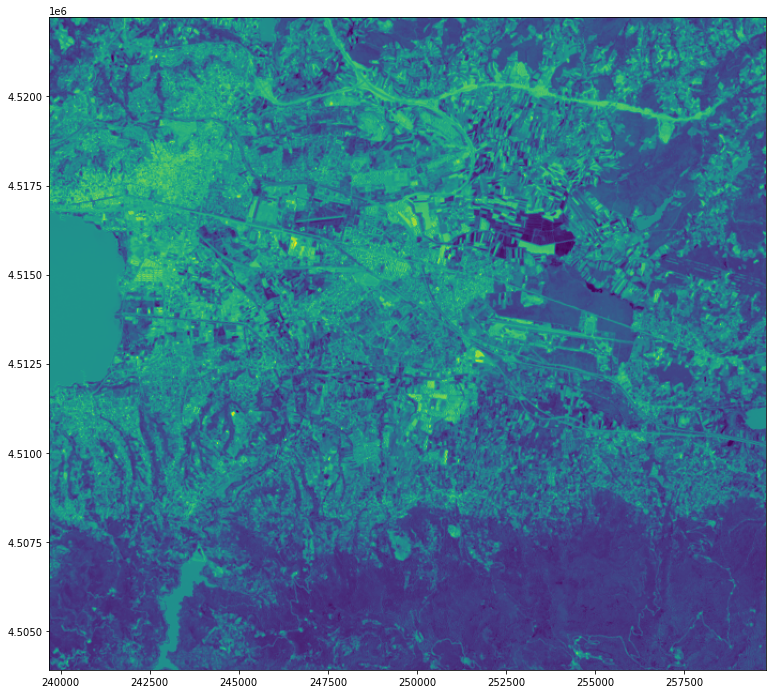

<AxesSubplot:>

In [27]:
#plot NDBI
NDBI = rasterio.open('../bireyselrasterio/Output/NDBI.tif')
fig = plt.figure(figsize=(18,12))
plot.show(NDBI)


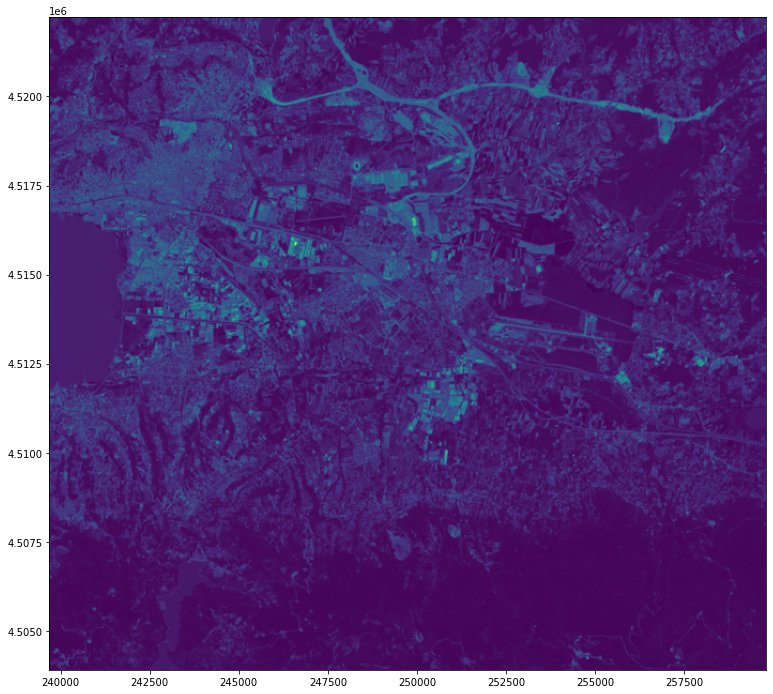

<AxesSubplot:>

In [28]:
#NBI calculation, empty cells or nodata cells are reported as 0
NBI=np.where(
    (NIR)==0., 
    0, 
    (SWIR1*RED)/(NIR))
NBI[:5,:5]
#export NBI image
NBIImage = rasterio.open('../bireyselrasterio/Output/NBI.tif','w',driver='Gtiff',
                          width=band4.width, 
                          height = band4.height, 
                          count=1, crs=band4.crs, 
                          transform=band4.transform, 
                          dtype='float64')
NBIImage.write(NBI,1)
NBIImage.close()
#plot NBI
NBI = rasterio.open('../bireyselrasterio/Output/NBI.tif')
fig = plt.figure(figsize=(18,12))
plot.show(NBI)